In [146]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Problem 1** : (5 pts) Suppose that for two football teams, the probability, $P$, that team A will beat team B is given by 
$$
P = \frac{1+p}{2}\left(\frac{p}{1-p+p^{2}} \right)^{21}
$$
where $p$ is the probability that team A punts on a fourth down (ok, I really know nothing about football, but I think that kind of makes sense...)  Determine to within $10^{-3}$ the minimal value of $p$ that will ensure that team $A$ beats team $B$ at least half of the time.

**Answer:**

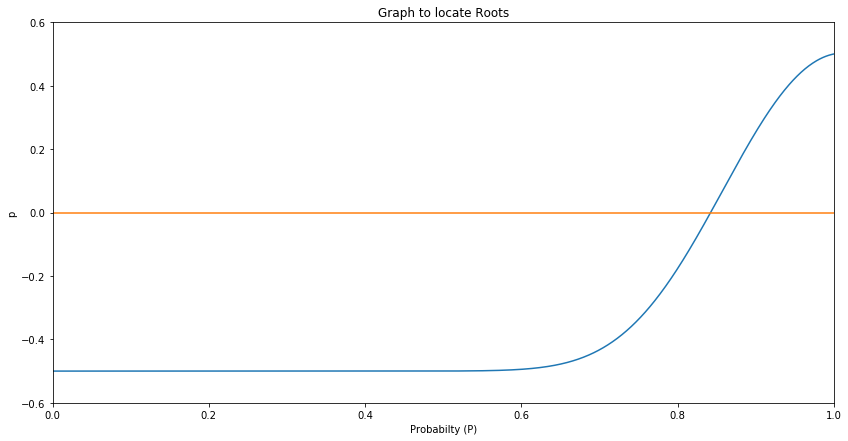

In [79]:
pvals = np.linspace(0, 1, 1000)
yvals = (1. + pvals)/2. * (pvals/(1. - pvals + pvals**2.))**21. - 1./2.

plt.plot(pvals, yvals,pvals,np.zeros(len(pvals)))
plt.axis([0, 1, -0.6, 0.6])
plt.xlabel('Probabilty (P)')
plt.ylabel('p')
plt.title('Graph to locate Roots')
plt.gcf().set_size_inches(14,7)


So there is either a probability of 0 which means nothing happens to 1 which means it will definitely happen. You cannot have a probability greater than 1 so the root finding process should not exceed the value of 1. Now to find this value:



In [142]:
f = lambda x: ((1.+x)/2.)*((x/(1. - x + x**2.))**21.) - .5

def bisec_method(a,b,f,tol):
    fa,fb = f(a),f(b)
    if fa*fb<0:
        c = (a+b)/2.
        #capproxs = np.array([c]) # build an array to record the estimates we make for the root
        fc = f(c)
        while np.abs(fc)>=tol:
            if fa*fc<0:
                b = c
            else:
                a = c
                fa = fc
            c = (a+b)/2.
            #capproxs = np.append(capproxs,c)
            fc = f(c)
        #conv_plotter(capproxs)
        print "Our root is: %1.7f" %c
    else:
        print "Cannot ensure existence of root."

In [143]:
bisec_method(0, 1, f, 1e-3)

Our root is: 0.8422852


**Problem 2** : (10 pts) Using Newton's method, explain why the sequence 
$$
x_{n} = \frac{1}{2}x_{n-1} + \frac{A}{2x_{n-1}}, ~ n\geq1, ~ x_{0}>0,  
$$
converges to $\sqrt{A}$ (4 pts).  Hint, you need to think of a function whose root is $\sqrt{A}$.  Implement the method and characterize for various values of $x_{0}$ how quickly the method converges. (6 pts)

**Answer:**  A function whose root is $\sqrt{A}$ is
$$f(x)=x^{2}-A, $$

Looking at the first derivative,
$$f'(x)=2x$$

Both $f(x)$ and $f'(x)$ are increasing for $x>0$. If Newton's method is used,

$$
x_{n} = \frac{1}{2}x_{n-1} + \frac{A}{2x_{n-1}}, ~ n\geq1, ~ x_{0}>0,  
$$

and if $x_{0}\in \left(0,\sqrt{A} \right)$, then $x_{1}>\sqrt{A}$, the tangent line (first derivative) produced does not hit $\sqrt{A}$. As long as  $x_{0}\in \left(0,\sqrt{A} \right)$ the sequence converges quickly to $\sqrt{A}$.

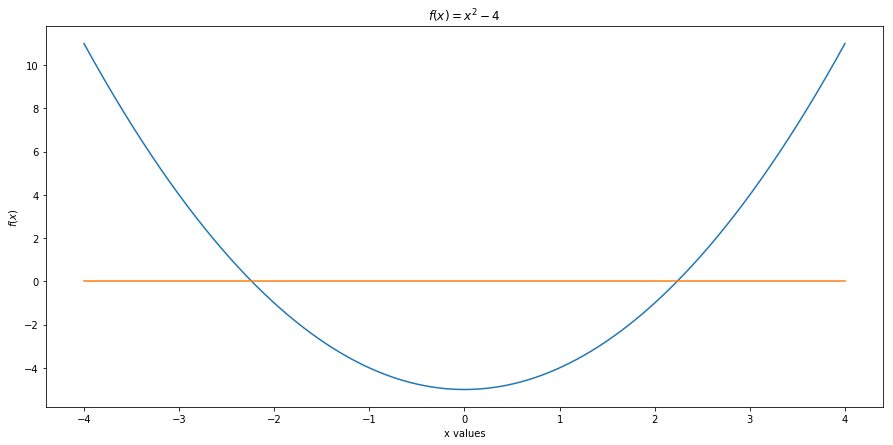

In [159]:
xvals2 = np.linspace(-4.,4.,int(1e3))
yvals2 = xvals2**2. - 5.
zvals2 = np.zeros(xvals.size)
plt.plot(xvals2,yvals2,xvals2,np.zeros(len(xvals2)))

plt.title('$f(x) = x^{2}- 4 $')
plt.xlabel('x values')
plt.ylabel('$f(x)$')

fig=plt.gcf()
plt.legend(loc=(.9,.1))
fig.set_size_inches(15,7)

In [178]:
f2 = lambda x: x**2 - 5.
fp2 = lambda x: 2*x

def Newtons_method2(f2,fp2,x0,tol):
    x1 = x0 - f2(x0)/fp2(x0)
    xapprox = np.array([x0,x1])
    while np.abs(x1-x0):
        x0 = x1
        x1 = x0 - f(x0)/fp(x0)
        xapprox = np.append(xapprox,x1)
    conv_plotter(xapprox)
    return xapprox

In [179]:
def conv_plotter2(cvals):
    clen = cvals.size
    cstr = cvals[clen-1]
    xvals = np.ma.log10(np.abs(cvals[:clen-2] - cstr))
    yvals = np.ma.log10(np.abs(cvals[1:clen-1] - cstr))
    ylen = yvals.size
    plt.plot(xvals,yvals)
    plt.ylabel('$\log|x_{n+1}-x_{*}|$',size=12)
    plt.xlabel('$\log|x_{n}-x_{*}|$',size=12)
    plt.title('Log/Log plot for root: %1.5f' %cvals[-1])
    plt.gcf().set_size_inches(15,7)
    
    slopes = (yvals[1:]-yvals[:ylen-1])/(xvals[1:]-xvals[:ylen-1])
    print 'Max slope: %1.5f' %np.max(slopes)
    print 'Min slope: %1.5f' %np.min(slopes)
    print 'Mean slope %1.5f' %np.mean(slopes)

Max slope: 4.28301
Min slope: 1.87806
Mean slope 2.53758
Root: -2.236067977499790


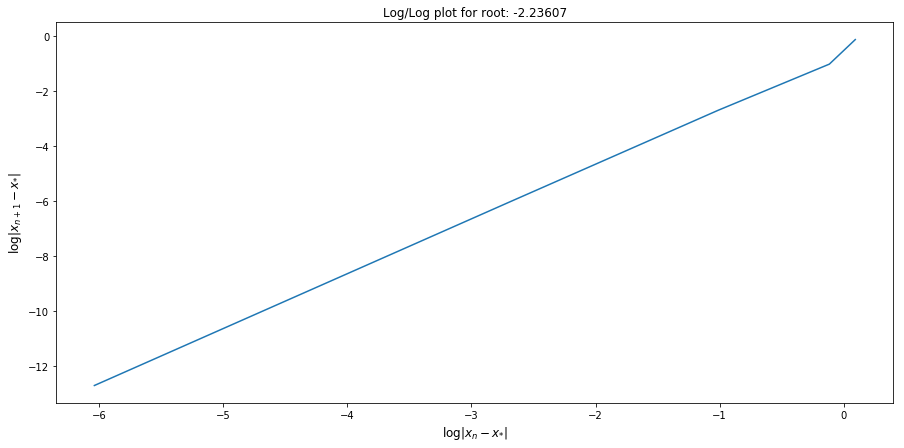

In [182]:
print 'Root: %1.15f' %Newtons_method2(f2,fp2,-1,1e-6)[-1]

Max slope: 4.28301
Min slope: 1.87806
Mean slope 2.53758
Root: 2.236067977499790


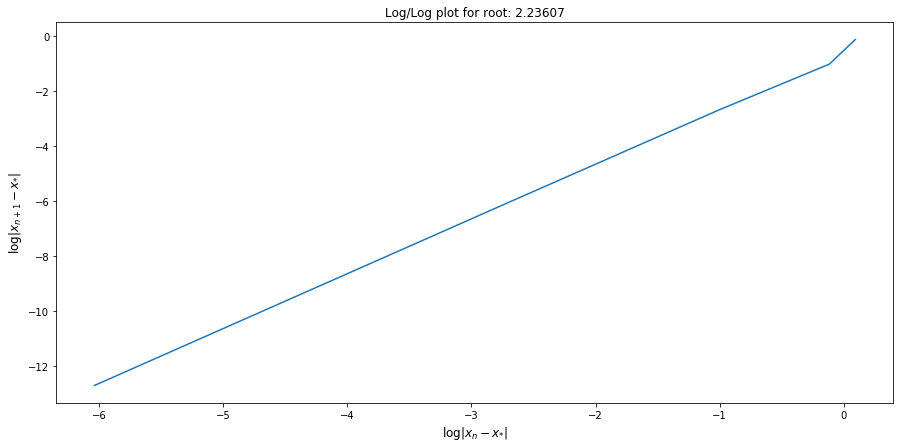

In [183]:
print 'Root: %1.15f' %Newtons_method2(f2,fp2,1,1e-6)[-1]

**Problem 3**: (5pts) In class for a root $x_{\ast}$ of $f(x)$, i.e. $f(x_{\ast})=0$, if $x_{0}$ is chosen "close" to $x_{\ast}$, then the sequence $\left\{x_{n}\right\}_{n=0}^{\infty}$  where 

$$
x_{n+1} = g\left(x_{n}\right), ~ g(x) = x - \frac{f(x)}{f'(x)}, ~ n\geq 0.
$$

should converge to $x_{\ast}$.  The question is how quickly.  So supposing that $f'(x_{\ast})\neq 0$ show 

* $g(x_{\ast}) = x_{\ast}$ (thus making $x_{\ast}$ a fixed point of $g(x)$)
* $g'(x_{\ast}) = 0$
* $x_{n+1} - x_{\ast} = \frac{1}{2}g''(x_{\ast})\left(x_{n}-x_{\ast}\right)^{2} + \mathcal{O}(\left(x_{n}-x_{\ast}\right)^{3})$

From this, infer that the rate of convergence (see the class notes for a definition of rate of convergence) for Newton's method is $\alpha = 2$.

**Answer:**

So supposing that $f'(x_{\ast})\neq 0$  

* $g(x_{\ast}) = x_{\ast}$ (thus making $x_{\ast}$ a fixed point of $g(x)$)

Given

$$
g(x) = x - \frac{f(x)}{f'(x)}
$$

then evaluating at $x_{*}$,

$$
g(x_{*}) = x_{*} - \frac{f(x_{*})}{f'(x_{*})}
$$


Given the condition $f(x_{*}) = 0$ and $f'(x_{*}) \neq 0$, the second term cancels out resulting in


$$
g(x_{*}) = x_{*}
$$


* $g'(x_{\ast}) = 0$


Given

$$
g(x) = x - \frac{f(x)}{f'(x)}
$$

Then,

$$
g'(x) = 1 - \frac{f'(x)^{2} - f(x)f''(x)}{f'(x)^{2}}
$$

then evaluating at $x_{*}$,

$$
g'(x_{*}) = 1 - \frac{f'(x_{*})^{2} - f(x_{*})f''(x_{*})}{f'(x_{*})^{2}}
$$

Given that $f(x_{*}) = 0$ results in 

$$
g'(x_{*}) = 1 - \frac{f'(x_{*})^{2}}{f'(x_{*})^{2}}
$$

$$
g'(x_{*}) = 1 - 1 = 0
$$


* $x_{n+1} - x_{\ast} = \frac{1}{2}g''(x_{\ast})\left(x_{n}-x_{\ast}\right)^{2} + \mathcal{O}(\left(x_{n}-x_{\ast}\right)^{3})$

Using TAYLOR SERIES EXPANSION

$$
g(x_{n}) = g(x_{*}) +(x_{n} - x_{*})g'(x_{*}) + \frac{1}{2}(x_{n} - x_{*})^{2}g''(x_{*}) + \mathcal{O}(\left(x_{n}-x_{\ast}\right)^{3})
$$

Using what we have found so far, that is $g(x_{n}) = x_{n+1}$, $g(x_{*}) = x_{*}$ and $g'(x_{*}) = 0$ and plugging into the above we get,


$$
x_{n+1} = x_{*} + \frac{1}{2}(x_{n} - x_{*})^{2}g''(x_{*}) + \mathcal{O}((x_{n} - x_{*})^{3})
$$

Simplifying to,
$$
x_{n+1} - x_{*} = \frac{1}{2}(x_{n} - x_{*})^{2}g''(x_{*}) + \mathcal{O}((x_{n} - x_{*})^{3})
$$

**Problem 4**: (10 pts) In many cases, getting convergence rates via pen and paper is tricky.  However, we can often readily find them via numerical simulation.  

a.) (4 pts) For 
$$
f(x) = x\cos(x) - \sin^{2}(x), 
$$
find all the roots on the interval $[0,5]$ using Newton's method with a tolerance of $10^{-6}$.


b.) (6 pts) For each root, establish that the rate of convergence is quadratic.  Note, to do this, you will need to save the various points generated by Newton's method in an array.  You will need to find the fixed point.  Then, you should note that if 
$$
\lim_{n\rightarrow \infty}\frac{|x_{n+1}-x_{\ast}|}{|x_{n}-x_{\ast}|^{\alpha}} = \lambda, 
$$  
then for $n$ large
$$
\ln |x_{n+1}-x_{\ast}| \sim \alpha \ln |x_{n}-x_{\ast}| + \ln \lambda
$$
So, then you should be thinking about the slope of a line in a log/log plot.  

Please provide a well-labeled and well-explained figure describing the rate of convergence for each fixed point.  Does your rate change based on your initial guess?  Again, please elaborate and show plots to make your case.

**Answer:**

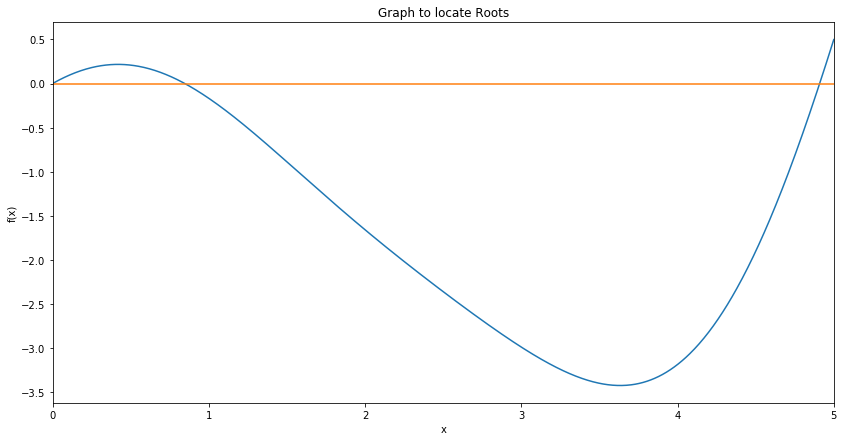

In [80]:
xvals = np.linspace(0, 5, 1000)
yvals = xvals * np.cos(xvals) - np.sin(xvals)**2

plt.plot(xvals, yvals,xvals,np.zeros(len(xvals)))
plt.xlim(0,5)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Graph to locate Roots')
plt.gcf().set_size_inches(14,7)

So there are a total of 4 roots. To find them we will implement Newtons Method:

In [170]:
def conv_plotter(cvals):
    clen = cvals.size
    cstr = cvals[clen-1]
    xvals = np.ma.log10(np.abs(cvals[:clen-2] - cstr))
    yvals = np.ma.log10(np.abs(cvals[1:clen-1] - cstr))
    ylen = yvals.size
    plt.plot(xvals,yvals)
    plt.ylabel('$\log|x_{n+1}-x_{*}|$',size=12)
    plt.xlabel('$\log|x_{n}-x_{*}|$',size=12)
    plt.title('Log/Log plot for root: %1.5f' %cvals[-1])
    plt.gcf().set_size_inches(15,7)
    
    slopes = (yvals[1:]-yvals[:ylen-1])/(xvals[1:]-xvals[:ylen-1])
    print 'Max slope: %1.5f' %np.max(slopes)
    print 'Min slope: %1.5f' %np.min(slopes)
    print 'Mean slope %1.5f' %np.mean(slopes)

In [117]:
f4 = lambda x: x*np.cos(x) - np.sin(x)**2
fp4 = lambda x: -x*np.sin(x)+np.cos(x)-np.sin(2*x)

def Newtons_method(f,fp,x0,tol):
    x1 = x0 - f(x0)/fp(x0)
    xapprox = np.array([x0,x1])
    while np.abs(x1-x0) >= tol:
        x0 = x1
        x1 = x0 - f(x0)/fp(x0)
        xapprox = np.append(xapprox,x1)
    conv_plotter(xapprox)
    return xapprox

Max slope: 2.00667
Min slope: 2.00667
Mean slope 2.00667
Root: -0.000000000000000


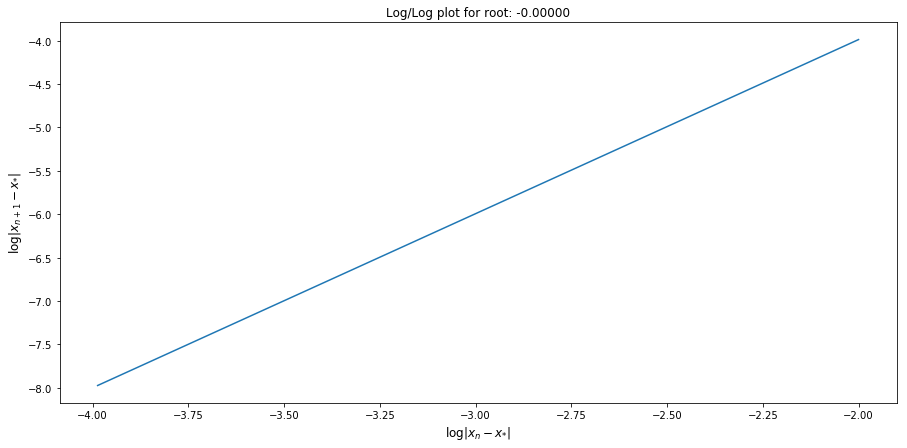

In [141]:
print 'Root: %1.15f' %Newtons_method(f4,fp4,0.01,1e-6)[-1]

Max slope: 1.99037
Min slope: 1.84833
Mean slope 1.91935
Root: 0.846446354857408


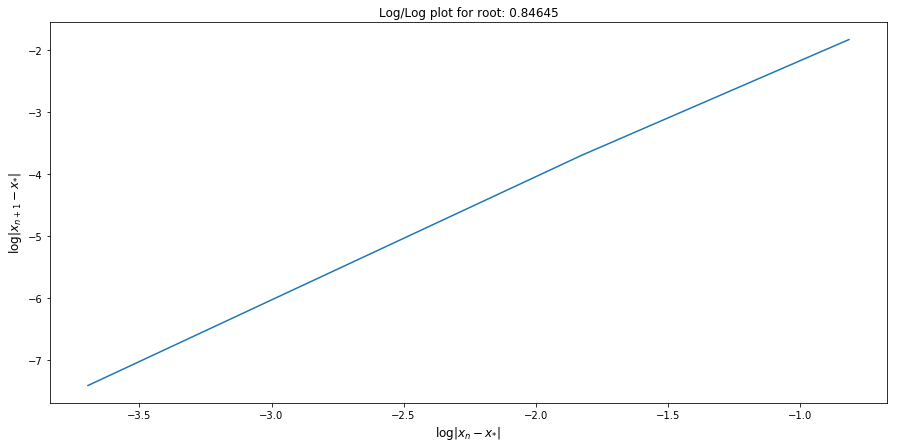

In [130]:
print 'Root: %1.15f' %Newtons_method(f4,fp4,1.,1e-6)[-1]

Max slope: 1.94799
Min slope: 1.94799
Mean slope 1.94799
Root: 4.909534391393232


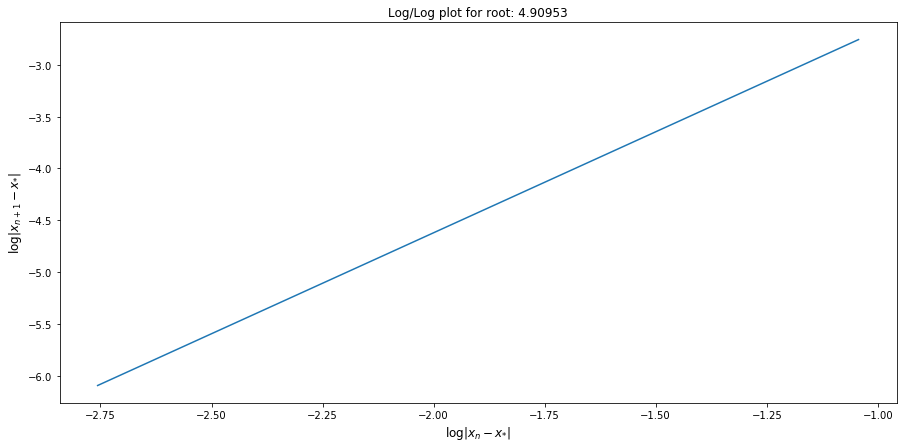

In [136]:
print 'Root: %1.15f' %Newtons_method(f4,fp4,5.,1e-6)[-1]

Newtons method has a rate of convergence of 2. For the given function the rate of convergence for each fixed point is close enough to 2. The rate does change depending on the initial guess. If using a point that is not close enough to the root then the rate of cocnvergence changes, so it is good to try different points that are close enough to the root. This is why it is recomeded to do the first plot.